In [7]:
from google_play_scraper import reviews
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

                                             content  \
0                                     I works Great!   
1                                        Easy to use   
2  They limited my account and I don't want is ha...   
3     Love to use it without having to bring my card   
4                                     App works well   

                  cleaned_content sentiment  
0                     works great  positive  
1                        easy use  positive  
2  limited account want happening  negative  
3     love use without bring card  positive  
4                  app works well  positive  
Scraping dan preprocessing selesai. Data disimpan dalam google_play_reviews.csv


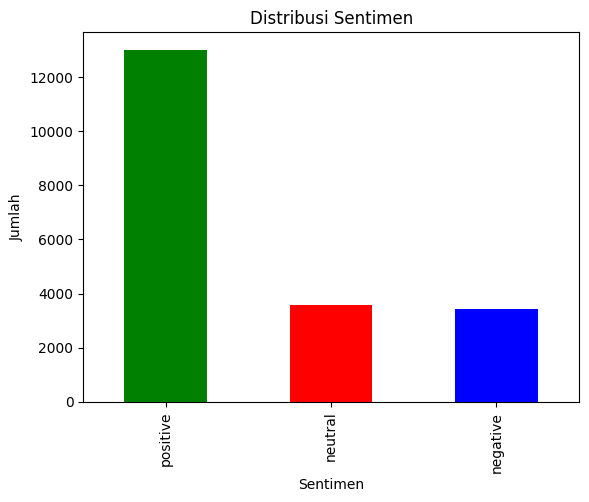

In [9]:
# Scraping reviews dari Google Play Store
def scrape_reviews(app_id, num_reviews=20000):
    result, _ = reviews(
        app_id,
        lang='en',
        country='us',
        count=num_reviews
    )
    df = pd.DataFrame(result)[['content']]
    return df

# Preprocessing teks
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Menentukan sentimen dengan VADER
def get_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)['compound']
    return 'positive' if score > 0 else 'negative' if score < 0 else 'neutral'

# Menampilkan distribusi label
def plot_sentiment_distribution(df):
    sentiment_counts = df['sentiment'].value_counts()
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title('Distribusi Sentimen')
    plt.xlabel('Sentimen')
    plt.ylabel('Jumlah')
    plt.show()

# Fungsi utama
def main():
    app_id = 'com.paypal.android.p2pmobile'  # Aplikasi PayPal
    df = scrape_reviews(app_id)

    # Preprocessing
    df['cleaned_content'] = df['content'].apply(preprocess_text)

    # Labelling Sentimen dengan VADER
    df['sentiment'] = df['cleaned_content'].apply(get_sentiment)

    print(df.head())
    df.to_csv('paypal_reviews.csv', index=False)
    print("Scraping dan preprocessing selesai. Data disimpan dalam google_play_reviews.csv")

    # Menampilkan distribusi label
    plot_sentiment_distribution(df)

if __name__ == "__main__":
    main()